# Introduction to Sprint Machine Learning Scratch
## Name: Nguyen Anh Hoang Phuc

### Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Problem 1 Scratch of train_test_split​
First, try scratching train_test_split of scikit-learn. Please implement the function based on the following template.

sklearn.model_selection.train_test_split - scikit-learn stable version documentation

Be sure to check if the created function train_test_split​

In [2]:
def scratch_train_test_split(X, y, train_size=0.8):
    """Divide the validation data.
    Parameters
    ----------
    X : ndarray
      Training data (n_samples, n_features)
    y : ndarray
      Correct answer value (n_samples,)
    train_size : float
      Specify what percentage to use as a train (0 < train_size < 1)
    Returns
    -------
    X_train : ndarray
      Training data (n_samples, n_features)
    X_test : ndarray
      Validation data (n_samples, n_features)
    y_train : ndarray
      Correct answer value of training data (n_samples,)
    y_test : ndarray
      Correct value of verification data (n_samples,)
    """
    # Write code here
    if train_size<=0 or train_size >= 1:
         raise ValueError('train_size={0} should be a float in the '
                         '(0, 1) range'.format(train_size))
    train_size = int(train_size*X.shape[0])
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    split = np.split(X, [train_size])
    X_train = split[0]
    X_test = split[1]
    split = np.split(y, [train_size])
    y_train = split[0]
    y_test = split[1]
    return X_train, X_test, y_train, y_test

In [3]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X = np.concatenate([f0, f1])
y = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])

In [4]:
print(X.shape,y.shape)

(500, 2) (500,)


In [5]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X,y)

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 2) (100, 2) (400,) (100,)


In [7]:
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
print(X.shape,y.shape)

(40, 2) (40,)


In [9]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X,y)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32, 2) (8, 2) (32,) (8,)


### Load data

In [11]:
data = load_iris()

In [12]:
list(data.target_names)

['setosa', 'versicolor', 'virginica']

In [13]:
idx = []
y = []
for i, val in enumerate(data.target):
    if val == 1 or val == 2:
        idx.append(i)
        if val == 1:
            y.append(0)
        else:
            y.append(1)
X = data.data[idx]
y = np.asarray(y)

In [14]:
print(X.shape, X)

(100, 4) [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [5.  2.  3.5 1. ]
 [5.9 3.  4.2 1.5]
 [6.  2.2 4.  1. ]
 [6.1 2.9 4.7 1.4]
 [5.6 2.9 3.6 1.3]
 [6.7 3.1 4.4 1.4]
 [5.6 3.  4.5 1.5]
 [5.8 2.7 4.1 1. ]
 [6.2 2.2 4.5 1.5]
 [5.6 2.5 3.9 1.1]
 [5.9 3.2 4.8 1.8]
 [6.1 2.8 4.  1.3]
 [6.3 2.5 4.9 1.5]
 [6.1 2.8 4.7 1.2]
 [6.4 2.9 4.3 1.3]
 [6.6 3.  4.4 1.4]
 [6.8 2.8 4.8 1.4]
 [6.7 3.  5.  1.7]
 [6.  2.9 4.5 1.5]
 [5.7 2.6 3.5 1. ]
 [5.5 2.4 3.8 1.1]
 [5.5 2.4 3.7 1. ]
 [5.8 2.7 3.9 1.2]
 [6.  2.7 5.1 1.6]
 [5.4 3.  4.5 1.5]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [6.3 2.3 4.4 1.3]
 [5.6 3.  4.1 1.3]
 [5.5 2.5 4.  1.3]
 [5.5 2.6 4.4 1.2]
 [6.1 3.  4.6 1.4]
 [5.8 2.6 4.  1.2]
 [5.  2.3 3.3 1. ]
 [5.6 2.7 4.2 1.3]
 [5.7 3.  4.2 1.2]
 [5.7 2.9 4.2 1.3]
 [6.2 2.9 4.3 1.3]
 [5.1 2.5 3.  1.1]
 [5.7 2.8 4.1 1.3]
 [6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7

In [15]:
print(y.shape, y)

(100,) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y)

In [17]:
print(X_train.shape, X_train)

(80, 4) [[6.8 3.2 5.9 2.3]
 [5.5 2.6 4.4 1.2]
 [6.  2.7 5.1 1.6]
 [7.7 2.6 6.9 2.3]
 [6.9 3.1 5.1 2.3]
 [6.2 2.9 4.3 1.3]
 [7.7 3.8 6.7 2.2]
 [6.7 3.  5.2 2.3]
 [5.6 2.8 4.9 2. ]
 [5.7 2.8 4.5 1.3]
 [6.  2.2 4.  1. ]
 [6.3 2.9 5.6 1.8]
 [4.9 2.5 4.5 1.7]
 [6.7 3.1 5.6 2.4]
 [4.9 2.4 3.3 1. ]
 [5.5 2.4 3.7 1. ]
 [6.1 3.  4.9 1.8]
 [7.3 2.9 6.3 1.8]
 [7.6 3.  6.6 2.1]
 [6.4 3.2 4.5 1.5]
 [6.5 3.  5.8 2.2]
 [5.8 2.7 3.9 1.2]
 [7.7 3.  6.1 2.3]
 [6.4 2.9 4.3 1.3]
 [5.6 2.9 3.6 1.3]
 [5.9 3.  5.1 1.8]
 [6.2 3.4 5.4 2.3]
 [5.7 3.  4.2 1.2]
 [5.6 2.5 3.9 1.1]
 [6.5 3.2 5.1 2. ]
 [6.5 3.  5.5 1.8]
 [6.6 2.9 4.6 1.3]
 [6.3 3.3 6.  2.5]
 [6.9 3.1 4.9 1.5]
 [6.2 2.2 4.5 1.5]
 [5.7 2.8 4.1 1.3]
 [6.4 3.1 5.5 1.8]
 [7.2 3.  5.8 1.6]
 [6.3 2.5 5.  1.9]
 [6.2 2.8 4.8 1.8]
 [6.  2.2 5.  1.5]
 [6.  2.9 4.5 1.5]
 [6.3 2.5 4.9 1.5]
 [7.4 2.8 6.1 1.9]
 [5.6 2.7 4.2 1.3]
 [6.4 2.8 5.6 2.2]
 [5.5 2.5 4.  1.3]
 [6.5 3.  5.2 2. ]
 [5.6 3.  4.1 1.3]
 [6.5 2.8 4.6 1.5]
 [6.7 3.3 5.7 2.1]
 [6.7 3.1 4.4 1.4]
 [5.

In [18]:
print(X_test.shape, X_test)

(20, 4) [[5.1 2.5 3.  1.1]
 [6.8 3.  5.5 2.1]
 [6.1 2.8 4.7 1.2]
 [7.1 3.  5.9 2.1]
 [7.7 2.8 6.7 2. ]
 [6.3 2.7 4.9 1.8]
 [6.7 3.  5.  1.7]
 [5.5 2.4 3.8 1.1]
 [6.4 2.7 5.3 1.9]
 [5.4 3.  4.5 1.5]
 [6.1 2.6 5.6 1.4]
 [5.9 3.2 4.8 1.8]
 [6.8 2.8 4.8 1.4]
 [6.7 3.1 4.7 1.5]
 [6.3 3.4 5.6 2.4]
 [7.  3.2 4.7 1.4]
 [5.7 2.9 4.2 1.3]
 [6.1 2.8 4.  1.3]
 [6.4 3.2 5.3 2.3]
 [5.7 2.5 5.  2. ]]


In [19]:
print(y_train.shape, y_train)

(80,) [1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1
 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1
 1 0 0 0 0 1]


In [20]:
print(y_test.shape, y_test)

(20,) [0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1]


### Using Logistic Regression

In [21]:
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

In [22]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [23]:
print(clf.score(X_test, y_test))

0.9


### Using SVM

In [24]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [25]:
print(clf.score(X_test, y_test))

0.9


### Using Decision tree

In [26]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [27]:
print(clf.score(X_test, y_test))

0.85


## Problem 2
Create code to train and estimate 3 types of datasets using the 3 types of methods above.

### Dataset 1

In [28]:
data = load_iris()
X1 = data.data
y1 = data.target
X1_train, X1_test, y1_train, y1_test = scratch_train_test_split(X1, y1)

In [29]:
print(X1.shape,y1.shape)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(150, 4) (150,)
(120, 4) (30, 4) (120,) (30,)


### Dataset 2

In [30]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X2 = np.concatenate([f0, f1])
y2 = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])
X2_train, X2_test, y2_train, y2_test = scratch_train_test_split(X2, y2)

In [31]:
print(X2.shape,y2.shape)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(500, 2) (500,)
(400, 2) (100, 2) (400,) (100,)


### Dataset 3

In [32]:
X3 = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y3 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
X3_train, X3_test, y3_train, y3_test = scratch_train_test_split(X3, y3)

In [33]:
print(X3.shape,y3.shape)
print(X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape)

(40, 2) (40,)
(32, 2) (8, 2) (32,) (8,)


### Method 1 Using Logistic Regression

In [34]:
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

# First dataset
clf.fit(X1_train, y1_train)
print("Dataset 1 score: ", clf.score(X1_test, y1_test))

# Second dataset
clf.fit(X2_train, y2_train)
print("Dataset 2 score: ", clf.score(X2_test, y2_test))

# Third dataset
clf.fit(X3_train, y3_train)
print("Dataset 3 score: ", clf.score(X3_test, y3_test))

Dataset 1 score:  1.0
Dataset 2 score:  1.0
Dataset 3 score:  0.625


### Method 2 Using SVM

In [35]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# First dataset
clf.fit(X1_train, y1_train)
print("Dataset 1 score: ", clf.score(X1_test, y1_test))

# Second dataset
clf.fit(X2_train, y2_train)
print("Dataset 2 score: ", clf.score(X2_test, y2_test))

# Third dataset
clf.fit(X3_train, y3_train)
print("Dataset 3 score: ", clf.score(X3_test, y3_test))

Dataset 1 score:  0.9666666666666667
Dataset 2 score:  1.0
Dataset 3 score:  0.625


### Method 3 Using Decision Tree

In [36]:
clf = DecisionTreeClassifier(random_state=0)

# First dataset
clf.fit(X1_train, y1_train)
print("Dataset 1 score: ", clf.score(X1_test, y1_test))

# Second dataset
clf.fit(X2_train, y2_train)
print("Dataset 2 score: ", clf.score(X2_test, y2_test))

# Third dataset
clf.fit(X3_train, y3_train)
print("Dataset 3 score: ", clf.score(X3_test, y3_test))

Dataset 1 score:  0.8666666666666667
Dataset 2 score:  1.0
Dataset 3 score:  0.375


### Regression problem

Regression then scratches one type.

<li> Linear regression


For linear regression, use SGDRegressor class, which is calculated using gradient descent.

sklearn.linear_model.SGDRegressor - scikit-lear stable version documentation

The data set is from the House Prices competition as in the pre-study period.

House Prices: Advanced Regression Techniques

Downloadtrain.csvand use SalePriceas the objective variable andGrLivAreaand YearBuiltas the explanatory variables

In [37]:
pd_train = pd.read_csv('train.csv') 
data = pd_train[["GrLivArea","YearBuilt", "SalePrice"]]

In [38]:
data.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [39]:
X = data.loc[:, ["GrLivArea","YearBuilt"]]
y = data["SalePrice"]
X_train, X_test, y_train, y_test = scratch_train_test_split(np.array(X), np.array(y))

### Learn

In [40]:
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

reg_area = clf.fit(X_train[:,0].reshape(-1,1), y_train)
reg_yearbuild = clf.fit(X_train[:,1].reshape(-1,1), y_train)

### Predict

In [41]:
reg_pred_area = reg_area.predict(X_test[:,0].reshape(-1,1))
reg_pred_yearbuild = reg_yearbuild.predict(X_test[:,1].reshape(-1,1))

### Evaluation 

In [42]:
print("MSE GrLivArea:", mean_squared_error(y_true=y_test, y_pred=reg_pred_area))
print("MSE YearBuilt:", mean_squared_error(y_true=y_test, y_pred=reg_pred_yearbuild))

MSE GrLivArea: 7353881788.318493
MSE YearBuilt: 6550538996.537671


### Visualization

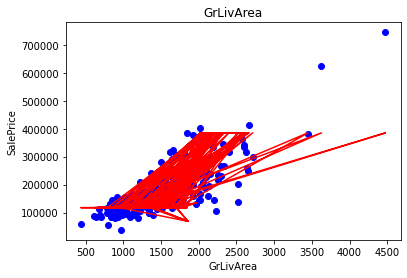

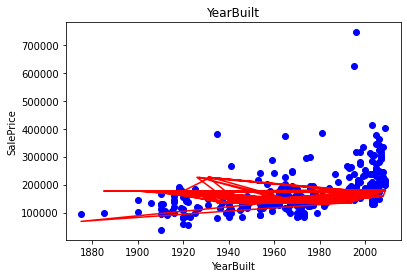

In [43]:
plt.scatter(X_test[:,0], y_test, color="blue", label='actual')
plt.plot(X_test[:,0],reg_pred_area, color="red", label='predicted')
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

plt.scatter(X_test[:,1], y_test, color="blue", label='actual')
plt.plot(X_test[:,1], reg_pred_yearbuild, color="red", label='predicted')
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

## Problem 3 Creating a code to solve the regression problem
Create code to train and estimate the House Prices data set with linear regression.

In [44]:
def train_estimate(X, y):
    X_train, X_test, y_train, y_test = scratch_train_test_split(np.array(X), np.array(y))
    clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

    reg_area = clf.fit(X_train[:,0].reshape(-1,1), y_train)
    reg_yearbuild = clf.fit(X_train[:,1].reshape(-1,1), y_train)
    reg_pred_area = reg_area.predict(X_test[:,0].reshape(-1,1))
    reg_pred_yearbuild = reg_yearbuild.predict(X_test[:,1].reshape(-1,1))
    print("MSE GrLivArea:", mean_squared_error(y_true=y_test, y_pred=reg_pred_area))
    print("MSE YearBuilt:", mean_squared_error(y_true=y_test, y_pred=reg_pred_yearbuild))

    plt.scatter(X_test[:,0], y_test, color="blue", label='actual')
    plt.plot(X_test[:,0],reg_pred_area, color="red", label='predicted')
    plt.title('GrLivArea')
    plt.xlabel('GrLivArea')
    plt.ylabel('SalePrice')
    plt.show()

    plt.scatter(X_test[:,1], y_test, color="blue", label='actual')
    plt.plot(X_test[:,1], reg_pred_yearbuild, color="red", label='predicted')
    plt.title('YearBuilt')
    plt.xlabel('YearBuilt')
    plt.ylabel('SalePrice')
    plt.show()

MSE GrLivArea: 13430363175.273973
MSE YearBuilt: 5581620099.174658


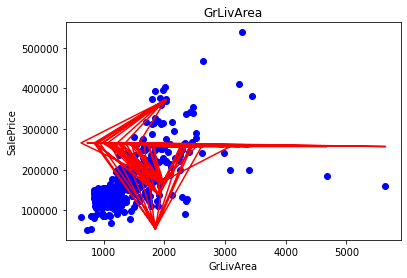

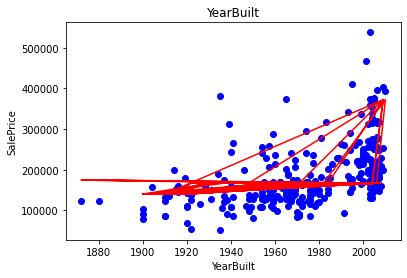

In [45]:
pd_train = pd.read_csv('train.csv') 
data = pd_train[["GrLivArea","YearBuilt", "SalePrice"]]
X = data.loc[:, ["GrLivArea","YearBuilt"]]
y = data["SalePrice"]
train_estimate(X, y)